# <center><font color=slate>Neural Networks</font></center>
Logistic regression cannot form more complex hypotheses as it is only a linear classier.
In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before.
The neural network will be able to represent complex models that form non-linear hypotheses.

## <center><font color=tomato>Model Representation</font></center>
Our neural network has 3 layers- an input layer, a hidden layer and an output layer.
Our inputs are pixel values of digit images.
Since the images are of size 20 x 20, this gives us 400 input layer units (excluding the extra bias unit which always outputs +1).
As before, the training data will be loaded into the variables X and y.


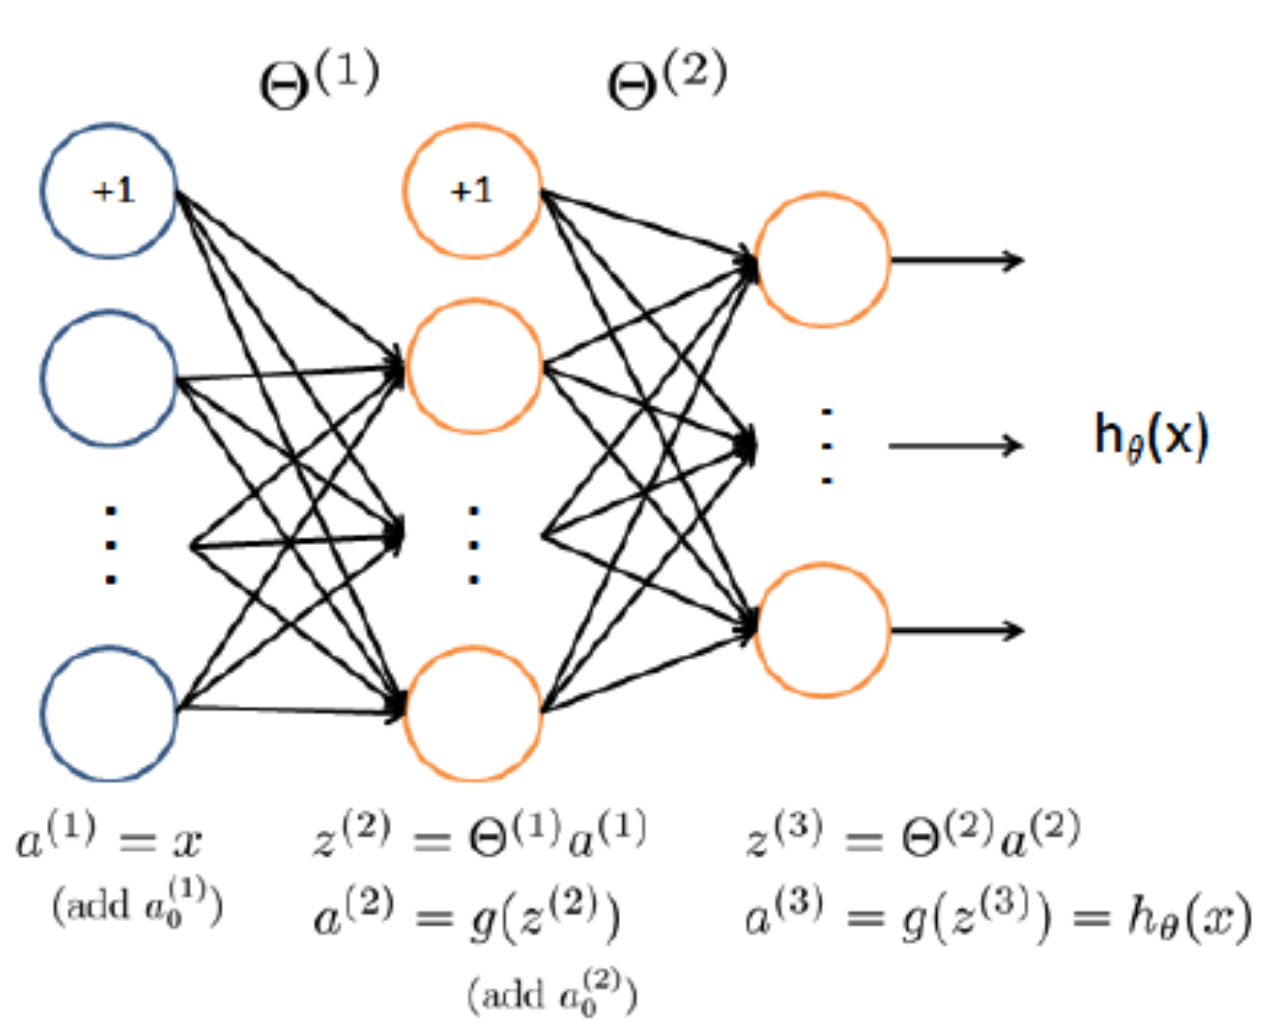

In [1]:
from IPython.core.display import Image, display
display(Image('data/neural_network.png'))


$a^{(2)}_1 = g(Θ^{(1)}_{10}x_0 + Θ^{(1)}_{11}x_1 + Θ^{(1)}_{12}x_2 + Θ^{(1)}_{13}x_3)$
$a^{(2)}_2 = g(Θ^{(1)}_{20}x_0 + Θ^{(1)}_{21}x_1 + Θ^{(1)}_{22}x_2 + Θ^{(1)}_{23}x_3)$
$a^{(2)}_3 = g(Θ^{(1)}_{30}x_0 + Θ^{(1)}_{31}x_1 + Θ^{(1)}_{32}x_2 + Θ^{(1)}_{33}x_3)$
$a^{(2)}_3 = g(Θ^{(1)}_{30}x_0 + Θ^{(1)}_{31}x_1 + Θ^{(1)}_{32}x_2 + Θ^{(1)}_{33}x_3)$

$$hΘ(x) = a^{(3)}_1 = g(Θ^{(2)}_{10}a^{(2)}_0 + Θ^{(2)}_{11}a^{(2)}_1 + Θ^{(2)}_{12}a^{(2)}_2 + Θ^{(2)}_{13}a^{(2)}_3)$$

### <font color=lightGreen>Vectorized</font>
$a^{(1)} = x$ Adding $a^{(1)}_0$

$z^{(2)} = Θ^{(1)}a^{(1)}$ --------  $a^{(2)} = g(z^{(2)})$ Adding $a^{(2)}_0$

$z^{(3)} = Θ^{(2)}a^{(2)}$ --------  $a^{(3)} = g(z^{(3)}) = hΘ(x)$

## <center><font color=tomato>1. Feedforward</font></center>
### <font color=lightGreen>1.1 Load and visualize data</font>

In [2]:
from display_data import displayData
import numpy as np
import scipy.optimize as opt
import scipy.io
from neural_networks import *

# Load Training Data
data = scipy.io.loadmat('data/ex4data1.mat')
X = data['X']
y = data['y']
m = X.shape[0]
# crucial step in getting good performance!
# changes the dimension from (m,1) to (m,)
# otherwise the minimization isn't very effective...
y=y.flatten()


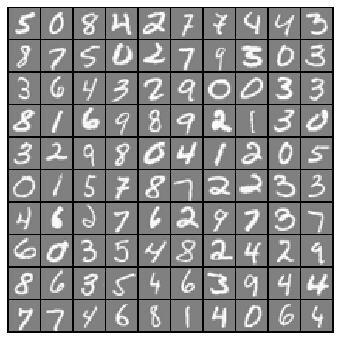

In [3]:
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100],:]
displayData(sel);

### <font color=lightGreen>1.2 Prediction</font>

In [4]:
data = scipy.io.loadmat('data/ex4weights.mat')
theta1 = data["Theta1"]
theta2 = data["Theta2"]

In [5]:
pred = neural_network_prediction(theta1, theta2, X)
acc = np.mean(pred == y)
print(f'Training Set Accuracy with neural network: {acc*100:.2f}%')

Training Set Accuracy with neural network: 87.60%


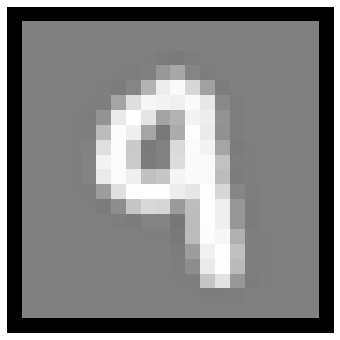

Neural Network Prediction: 9 (digit 9)


In [6]:
m = X.shape[0]
rp = np.random.randint(m)
displayData(X[rp, :])
x = X[[rp], :]

pred = neural_network_prediction(theta1, theta2, x)
print('Neural Network Prediction: {:d} (digit {:d})'.format(pred[0], (pred%10)[0]))


### <font color=lightGreen>1.3. Cost Function</font>
<center>

$$J(θ) = \frac{1}{m}  \sum_{i=1}^m \sum_{k=1}^K [-y^{(i)}_k log(h_θ(x^{(i)})_k) - (1 - y^{(i)}_k) log (1 - h_θ(x^{(i)})_k)]$$
</center>


In [7]:
## Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
Lambda = 0

nn_params = unroll_parameters(theta1, theta2)
J, _ = nn_cost_function_reg(nn_params, input_layer_size, hidden_layer_size, X, y, Lambda)
print(f'Training Set Accuracy: {J:.6f}\n(this value should be about 0.287629)')

Training Set Accuracy: 0.287629
(this value should be about 0.287629)


### <font color=lightGreen>1.4 Regularized cost function</font>
$$J(θ) = \frac{1}{m}  \sum_{i=1}^m \sum_{k=1}^K [-y^{(i)}_k log(h_θ(x^{(i)})_k) - (1 - y^{(i)}_k) log (1 - h_θ(x^{(i)})_k)]$$ $$+ \frac{1}{m} \sum_{l=1}^{L-1} \sum_{i=1}^{s_j} \sum_{j=1}^{s_{j+1}} (Θ^{(l)}_{j,i})^2$$

In [8]:
# Weight regularization parameter (we set this to 1 here).
Lambda = 1

J, _ = nn_cost_function_reg(nn_params, input_layer_size, hidden_layer_size, X, y, Lambda)
print(f'Cost at parameters (loaded from ex4weights): {J:6f}\n(this value should be about 0.383770)')



Cost at parameters (loaded from ex4weights): 0.383770
(this value should be about 0.383770)


## <center><font color=tomato>Backpropagation</font></center>
Steps:

Given training set ${(x^{(1)}, y^{(1)}) ... (x^{(m)}, y^{(m)})}$

Set $\Delta^{(l)}_{ij} := 0$ for all $(i, j, l)$, (hence you end up having a matrix full of zeros)

For training example t = 1 to m:
-   Set a $a^{(1)} := x^{(t)}$
-   Perform forward propagation to compute $a^{(1)}$ for l = 2, 3, ...L
-   Using $y^t$, compute $𝛿^{(L)} = a^{(L)} - y^{(t)}$

Where L is our total number of layers and $a^{(L)}$ is the vector of outputs of the activation units for the last layer.
So our "error values" for the last layer are simply the differences of our actual results in the last layer and the correct outputs in y.
To get the delta values of the layers before the last layer, we can use an equation that steps us back from right to left:

-   Compute $\delta^{(L-1)}, \delta^{(L-2)},\dots,\delta^{(2)}$ using $\delta^{(l)} = ((\Theta^{(l)})^T \delta^{(l+1)})\ .*\ a^{(l)}\ .*\ (1 - a^{(l)})$

The delta values of layer l are calculated by multiplying the delta values in the next layer with the theta matrix of layer l. We then element-wise multiply that with a function called g',
or g-prime, which is the derivative of the activation function g evaluated with the input values given by $z^{(l)}$

The g-prime derivative terms can also be written out as:

$g'(z^{(l)}) = a^{(l)}.*(1 - a^{(l)})$

$\Delta^{(l)}_{i,j} := \Delta^{(l)}_{i,j} + a_j^{(l)} \delta_i^{(l+1)}$ or with vectorization, $\Delta^{(l)} := \Delta^{(l)} + \delta^{(l+1)}(a^{(l)})^T$ Hence we update our new $\Delta$ matrix.

matrix.

$D^{(l)}_{i,j} := \dfrac{1}{m}\left(\Delta^{(l)}_{i,j} + \lambda\Theta^{(l)}_{i,j}\right)$, if j!=0.

$D^{(l)}_{i,j} := \dfrac{1}{m}\Delta^{(l)}_{i,j}$, if j==0.


The capital-delta matrix D is used as an "accumulator" to add up our values as we go along and eventually compute our partial derivative.
Thus we get $\frac \partial {\partial \Theta_{ij}^{(l)}} J(\Theta) = D_{ij}^{(l)}$

### <font color=lightGreen>2.1 Sigmoid gradient</font>
$g'(z) = \dfrac {d}{dz}g(z) = g(z)(1 - g(z))$
where

$sigmoid(z) = g(z) = \dfrac {1}{1+e^{-z}}$

In [9]:
g = sigmoid_gradient(0)
print(f'Sigmoid gradient evaluated at 0: {g}')

Sigmoid gradient evaluated at 0: 0.25


### <font color=lightGreen>2.2 Random initialization</font>
Initializing all theta weights to zero does not work with neural networks.
When we backpropagate, all nodes will update to the same value repeatedly.

Hence, we initialize each $\Theta^{(l)}_{ij}$ to a random value between [−ϵ,ϵ].
The same procedure applies to all the Θ's.

In [10]:
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
Lambda = 1
num_labels = np.unique(y).size
initial_theta1 = rand_initialize_weights(input_layer_size, hidden_layer_size)
initial_theta2 = rand_initialize_weights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = unroll_parameters(initial_theta1, initial_theta2)

### <font color=lightGreen>2.3 Implement backpropagation</font>

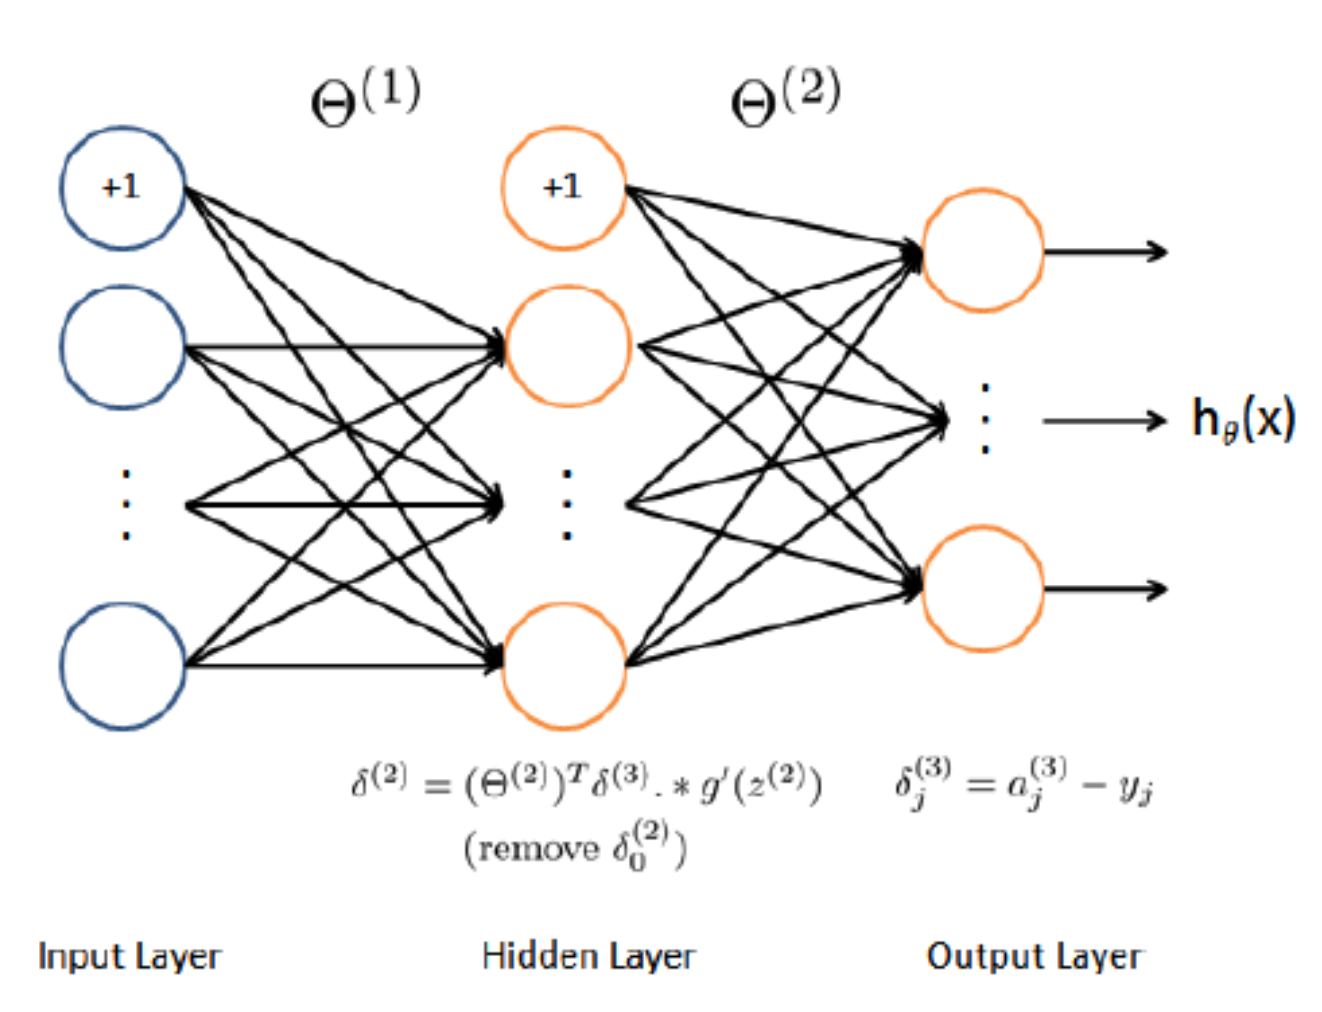

In [11]:
from IPython.core.display import Image, display
display(Image('data/backpropagation.png'))

### <font color=lightGreen>2.4.  Gradient checking</font>
Gradient checking will assure that our backpropagation works as intended. We can approximate the derivative of our cost function with numerical gradient checking

$\dfrac{\partial}{\partial\Theta}J(\Theta) \approx \dfrac{J(\Theta + \epsilon) - J(\Theta - \epsilon)}{2\epsilon}$

$\dfrac{\partial}{\partial\Theta_j}J(\Theta) \approx \dfrac{J(\Theta_1, \dots, \Theta_j + \epsilon, \dots, \Theta_n) - J(\Theta_1, \dots, \Theta_j - \epsilon, \dots, \Theta_n)}{2\epsilon}$

A small value for {\epsilon}ϵ (epsilon) such as ${\epsilon = 10^{-4}}$, guarantees that the math works out properly.
If the value for $\epsilon$ is too small, we can end up with numerical problems.

The code below will run the function `check_NN_gradients()` which will create a small neural network and dataset that will be used for checking your gradients.
If your backpropagation implementation is correct, you should see a relative difference that is less than 1e-9.


In [12]:
check_NN_gradients()

Numerical Gradient       Analytical Gradient
0.006906540832574137     0.006906540840162157
0.012125104256188735     0.01212510426975958
0.006198479012287095     0.006198479017045425
-0.005423556830308485    -0.005423556834022438
-0.012076102853253445    -0.012076102864730183
-0.00011085270923416601  -0.00011085270971864142
-4.2982200021413064e-05  -4.298220175600267e-05
6.418726883339332e-05    6.418726575059829e-05
0.00011254971621355025   0.00011254971783297647
5.7200055803008354e-05   5.7200057096773715e-05
0.0001438518348884088    0.00014385183416399327
0.0001516661907174921    0.00015166618726006892
2.030122070451057e-05    2.0301223463596512e-05
-0.00013001847376514775  -0.000130018475479083
-0.00016050035744896718  -0.00016050035608194352
0.0002662996667623929    0.000266299665122975
0.00020687338064817595   0.00020687338315369128
-4.224967042887329e-05   -4.224967005194715e-05
-0.00025304828454864037  -0.0002530482820465939
-0.0002306374824456725   -0.00023063748206423687
0.102

### <font color=lightGreen>2.5 Regularized neural networks</font>
$ \frac \partial {\partial \Theta_{ij}^{(l)}} J(\Theta) = D_{ij}^{(l)}$
​

$D^{(l)}_{i,j} := \dfrac{1}{m}\left(\Delta^{(l)}_{i,j} + \lambda\Theta^{(l)}_{i,j}\right)$ if j≠0

$D^{(l)}_{i,j} := \dfrac{1}{m}\Delta^{(l)}_{i,j}$$ if j=0$

In [13]:
Lambda = 3
J, _ = nn_cost_function_reg(nn_params, input_layer_size, hidden_layer_size, X, y, Lambda)

print(f'Cost at (fixed) debugging parameters (w/ lambda_reg = 3): {J:6f} ' \
         '\n(this value should be about 0.576051)\n\n')

Cost at (fixed) debugging parameters (w/ lambda_reg = 3): 0.576051 
(this value should be about 0.576051)




### <font color=lightGreen>2.6 Learning parameters using scipy optimization algorithms</font>

In [14]:
maxiter = 50
lambda_reg = 0.1
myargs = (input_layer_size, hidden_layer_size, X, y, lambda_reg)
results = opt.minimize(nn_cost_function_reg, x0=nn_params, args=myargs, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)
nn_params = results['x']
theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], \
                 (hidden_layer_size, input_layer_size + 1), order='F')

theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):], \
                 (num_labels, hidden_layer_size + 1), order='F')

In [15]:
pred = neural_network_prediction(theta1, theta2, X)
acc = np.mean(pred == y)
print(f'Training Set Accuracy with neural network: {acc*100:.2f}%')

Training Set Accuracy with neural network: 89.96%


## <center><font color=tomato>3. Visualizing the hidden layer</font></center>

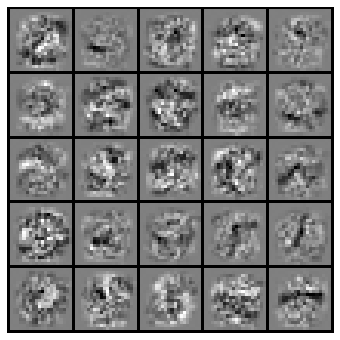

In [16]:
displayData(theta1[:, 1:]);


## <center><font color=tomato>4. Summary - Putting it Together</font></center>

First, pick a network architecture; choose the layout of your neural network, including how many hidden units in each layer and how many layers in total you want to have.

-   Number of input units = dimension of features $x^{(i)}$
-   Number of output units = number of classes
-   Number of hidden units per layer = usually more the better (must balance with cost of computation as it increases with more hidden units)
-    Defaults: 1 hidden layer. If you have more than 1 hidden layer, then it is recommended that you have the same number of units in every hidden layer.


Training a Neural Network

-   Randomly initialize the weights
-   Implement forward propagation to get $h_\Theta(x^{(i)})$
-   Implement the cost function
-   Implement backpropagation to compute partial derivatives
-   Use gradient checking to confirm that your backpropagation works. Then disable gradient checking.
-   Use gradient descent or a built-in optimization function to minimize the cost function with the weights in theta.